# In this notebook
- Randomized iterative methods (Gower's paper)
- Using them to linear solve matrices AX = B
- ADI 

All are tested very loosely with small matrices. A more formal unit test suite can be found in the project in `../src`.

In [154]:
using Random
using LinearAlgebra
using SparseArrays
using Plots
# using Printf

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242


## Sketch and project

Solves $Ax = b$

In [180]:
function rand_linsolve(A,b,B, Stype, seed=nothing)
    """
    Solves using randomized kaczmarz.
    Randomly selects a row per iteration to update x with
    
    INPUT:  matrix A mxn, 
            vector b mx1,
            matrix B nxn
            string Stype: "coordvec", ""
            
    OUTPUT: vector x nx1 that solves Ax = b
    """
    m,n = size(A)
    x0 = ones(n)
    sols = [x0] # list of x_0 ... x_n
    errs = zeros(0)
    if seed != nothing
        Random.seed!(seed)
    end
    @assert Stype == "coordvec"
    
    Binv = inv(B)
    xprev = x0
    while(true)
        
        i = rand(1:m)
        
        # S is a unit coordinate vector (temporary)
        S = zeros(m)
        S[i] = 1
        
        C = Binv * A' * S * pinv(S' * A * Binv * A' * S) * S'      
        res = A * xprev - b
        xnew = xprev - C * res

        
        push!(sols, xnew)
#         println("=====asdf!!!!! =====")
        err = norm(A * xnew - b)
#         println(errors)
#         println(err)
        push!(errs,err)
#         println("=====HELLO!!!!! =====")
        
        
        if err < 1e-5
            break
        end
        
        xprev = xnew
    end
    
    return sols,errs
end

rand_linsolve (generic function with 4 methods)

In [181]:
seed = 0

A = rand(Float64,3,5)
b = rand(Float64,3)
B = I # n x n 
display("text/plain",A)
display("text/plain",b)
display("text/plain",B)

sols,errs = rand_linsolve(A,b, B,"coordvec", seed)
println("done")

3×5 Array{Float64,2}:
 0.414729  0.0425996  0.288542  0.88546   0.161144
 0.545062  0.42695    0.272621  0.147544  0.262937
 0.275383  0.468115   0.59634   0.876637  0.942458

3-element Array{Float64,1}:
 0.9268565922365832
 0.6445268039216541
 0.3952846356052906

UniformScaling{Bool}
true*I

done


(181,)


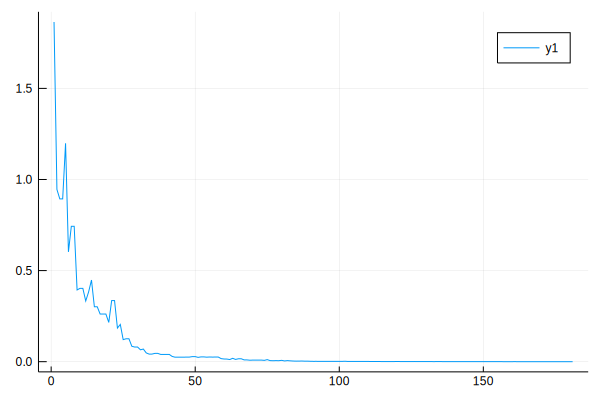

In [184]:
# print(sols[end])

println(size(errs))
# println(errs)
# numiters= size(errs)[1]
plot(1:numiters, errs[:,1])

In [82]:
function rand_matsolve(A,B,seed=None)
    """
    Helper function that stacks together multiple Ax=b solvers
    INPUT: A,B
    OUTPUT: X mxn matrix such that AX = B
    """
    sol = zeros(n,k)
    a,b = A.shape
    c,d = B.sha  
    @assert (a == c)
    
    for col in B.T:        
        x,errs = randomized_kaczmarz(A,col) 
        sol.append(x[-1])
    return (np.stack(sol,axis = -1))
    
end

rand_matsolve (generic function with 2 methods)

## ADI

Solves $AX - XB = N$ for low rank $N$